In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import time
import requests
from datetime import datetime, timedelta
from shapely.geometry import Point
from busSim import BusSim
from graph import Graph

In [6]:
#https://www.scls.info/sites/www.scls.info/files/ils/reports/pstatcirc/2019/Total%20CKO%20by%20PSTAT%2001-2019.xlsx
from urllib.request import urlretrieve
year = "2019"
#middle = "-circ-by-time-wkday"
tail = "-2019.xlsx"
madLib = [
    "HPB",
    "HAW",
    "LAK",
    "MAD",
    "MEA",
    "MSB",
    "PIN",
    "SEQ",
    "SMB"]

#for i in range(1,13):
    month = "0"+str(i) if i < 10 else str(i)
    downloadURL = "https://www.scls.info/sites/www.scls.info/files/ils/reports/pstatcirc/2019/Total%20CKO%20by%20PSTAT%20"+month+tail
    try:
        urlretrieve(downloadURL,"./time_slot/"+lib+middle+year+"-"+month+tail)
        print("Done "+month+year)
    except:
        print(downloadURL)

IndentationError: unexpected indent (<ipython-input-6-dc7fa21732db>, line 18)

In [2]:
madLib = [
    "HPB",
    "HAW",
    "LAK",
    "MAD",
    "MEA",
    "MSB",
    "PIN",
    "SEQ",
    "SMB"]

In [3]:
#dfdict = {}
g = gpd.read_file("zip://plot/background/tract_plot.zip")
month = "01"
df = pd.read_excel("./time_slot/Total CKO by PSTAT "+month+"-2019.xlsx")
df = df.dropna(subset=["Municipality"])
df["LINKcat"] = df["LINKcat"].fillna(0)
filter_data = df[df["Municipality"].str.contains('CITY CENSUS TRACT')]
filter_data["PSTAT"] = filter_data["PSTAT"].str.replace('D-',"")
filter_data = pd.merge(filter_data,g,left_on="PSTAT",right_on="NAME",how="left")
filter_data["sum"] = filter_data[madLib].sum(axis=1)
filter_data = filter_data[["PSTAT","sum"]]
c = filter_data[["PSTAT"]]

for i in range(1,13):
    month = "0"+str(i) if i < 10 else str(i)
    df = pd.read_excel("./time_slot/Total CKO by PSTAT "+month+"-2019.xlsx")
    df = df.dropna(subset=["Municipality"])
    df["LINKcat"] = df["LINKcat"].fillna(0)
    filter_data = df[df["Municipality"].str.contains('CITY CENSUS TRACT')]
    filter_data["PSTAT"] = filter_data["PSTAT"].str.replace('D-',"")
    filter_data = pd.merge(filter_data,g,left_on="PSTAT",right_on="NAME",how="left")
    filter_data["sum"] = filter_data[madLib].sum(axis=1)
    filter_data = filter_data[["PSTAT","sum"]]
    
    c =  pd.merge(c,filter_data,on="PSTAT",how="left")

c


c:\pathon\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\pathon\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\pathon\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

,PSTAT,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y
0,1,2178.0,2068.0,2025.0,1840.0,2017.0,2144.0,2036.0,1698.0,1688.0,2001.0,1883.0,1882.0
1,10,4598.0,4124.0,4535.0,4248.0,4139.0,3836.0,4617.0,4445.0,3825.0,4078.0,3869.0,3470.0
2,105.01,275.0,143.0,197.0,148.0,220.0,225.0,299.0,422.0,445.0,435.0,335.0,305.0
3,107.01,2.0,1.0,0.0,23.0,16.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
4,107.02,1400.0,1263.0,1294.0,1231.0,1130.0,1214.0,1246.0,1113.0,986.0,1000.0,975.0,867.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,6,1384.0,1285.0,1140.0,1206.0,1274.0,1201.0,1387.0,1555.0,1139.0,1111.0,1121.0,1108.0
63,7,5927.0,5680.0,6209.0,4949.0,5129.0,5447.0,5756.0,6008.0,5064.0,5067.0,5453.0,4611.0
64,8,7611.0,7155.0,8284.0,7681.0,7420.0,7074.0,7701.0,7520.0,7090.0,7506.0,7508.0,6550.0
65,9.01,4727.0,4783.0,5291.0,4848.0,4754.0,4844.0,5534.0,4836.0,4307.0,4606.0,4483.0,3555.0


In [5]:
c["sum"] = c.iloc[:,1:].sum(axis=1)
c

,PSTAT,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum
0,1,2178.0,2068.0,2025.0,1840.0,2017.0,2144.0,2036.0,1698.0,1688.0,2001.0,1883.0,1882.0,46920.0
1,10,4598.0,4124.0,4535.0,4248.0,4139.0,3836.0,4617.0,4445.0,3825.0,4078.0,3869.0,3470.0,99568.0
2,105.01,275.0,143.0,197.0,148.0,220.0,225.0,299.0,422.0,445.0,435.0,335.0,305.0,6898.0
3,107.01,2.0,1.0,0.0,23.0,16.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,106.0
4,107.02,1400.0,1263.0,1294.0,1231.0,1130.0,1214.0,1246.0,1113.0,986.0,1000.0,975.0,867.0,27438.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,6,1384.0,1285.0,1140.0,1206.0,1274.0,1201.0,1387.0,1555.0,1139.0,1111.0,1121.0,1108.0,29822.0
63,7,5927.0,5680.0,6209.0,4949.0,5129.0,5447.0,5756.0,6008.0,5064.0,5067.0,5453.0,4611.0,130600.0
64,8,7611.0,7155.0,8284.0,7681.0,7420.0,7074.0,7701.0,7520.0,7090.0,7506.0,7508.0,6550.0,178200.0
65,9.01,4727.0,4783.0,5291.0,4848.0,4754.0,4844.0,5534.0,4836.0,4307.0,4606.0,4483.0,3555.0,113136.0


In [6]:
blocks = gpd.read_file("zip://DataMerge/dane_blocks_shapes.zip")
blocks = blocks.to_crs("EPSG:4326")
blocks

,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,55,025,011504,1,550250115041,Block Group 1,G5030,S,1849504,0,+43.1906083,-089.2482047,"POLYGON ((-89.25928 43.18706, -89.25991 43.187..."
1,55,025,012501,1,550250125011,Block Group 1,G5030,S,3469020,0,+42.9077310,-089.3807759,"POLYGON ((-89.37390 42.91633, -89.37390 42.916..."
2,55,025,001403,1,550250014031,Block Group 1,G5030,S,2141835,8875,+43.0211647,-089.4410349,"POLYGON ((-89.44960 43.02226, -89.44958 43.022..."
3,55,025,013301,1,550250133011,Block Group 1,G5030,S,12509328,0,+43.2478834,-089.3162326,"POLYGON ((-89.34136 43.25267, -89.34141 43.253..."
4,55,025,013301,2,550250133012,Block Group 2,G5030,S,3830201,0,+43.2356950,-089.3326201,"POLYGON ((-89.33398 43.24769, -89.33167 43.247..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,55,025,011102,4,550250111024,Block Group 4,G5030,S,2270321,34087,+43.1140710,-089.4801041,"POLYGON ((-89.49144 43.11327, -89.49143 43.114..."
306,55,025,011102,2,550250111022,Block Group 2,G5030,S,2329858,7529,+43.1263555,-089.4965035,"POLYGON ((-89.50137 43.11301, -89.50137 43.113..."
307,55,025,011102,5,550250111025,Block Group 5,G5030,S,321007,4224,+43.1068366,-089.4780431,"POLYGON ((-89.47114 43.11042, -89.47154 43.110..."
308,55,025,012001,3,550250120013,Block Group 3,G5030,S,7241600,0,+43.0988322,-089.2184686,"POLYGON ((-89.24675 43.10702, -89.24676 43.107..."


In [8]:
df = pd.merge(c,g,left_on="PSTAT",right_on="NAME",how="left")
df

,PSTAT,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum,NAME,geometry
0,1,2178.0,2068.0,2025.0,1840.0,2017.0,2144.0,2036.0,1698.0,1688.0,2001.0,1883.0,1882.0,46920.0,1,"POLYGON ((-89.48240 43.09452, -89.48234 43.094..."
1,10,4598.0,4124.0,4535.0,4248.0,4139.0,3836.0,4617.0,4445.0,3825.0,4078.0,3869.0,3470.0,99568.0,10,"POLYGON ((-89.42096 43.06242, -89.42073 43.062..."
2,105.01,275.0,143.0,197.0,148.0,220.0,225.0,299.0,422.0,445.0,435.0,335.0,305.0,6898.0,105.01,"POLYGON ((-89.30807 43.04794, -89.30802 43.047..."
3,107.01,2.0,1.0,0.0,23.0,16.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,106.0,107.01,"POLYGON ((-89.42802 43.00121, -89.42802 43.001..."
4,107.02,1400.0,1263.0,1294.0,1231.0,1130.0,1214.0,1246.0,1113.0,986.0,1000.0,975.0,867.0,27438.0,107.02,"POLYGON ((-89.38662 42.97124, -89.38785 42.971..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,6,1384.0,1285.0,1140.0,1206.0,1274.0,1201.0,1387.0,1555.0,1139.0,1111.0,1121.0,1108.0,29822.0,6,"POLYGON ((-89.44362 43.03477, -89.44363 43.034..."
63,7,5927.0,5680.0,6209.0,4949.0,5129.0,5447.0,5756.0,6008.0,5064.0,5067.0,5453.0,4611.0,130600.0,7,"POLYGON ((-89.44362 43.03477, -89.44456 43.034..."
64,8,7611.0,7155.0,8284.0,7681.0,7420.0,7074.0,7701.0,7520.0,7090.0,7506.0,7508.0,6550.0,178200.0,8,"POLYGON ((-89.43621 43.07417, -89.43625 43.073..."
65,9.01,4727.0,4783.0,5291.0,4848.0,4754.0,4844.0,5534.0,4836.0,4307.0,4606.0,4483.0,3555.0,113136.0,9.01,"POLYGON ((-89.41391 43.06781, -89.41394 43.067..."


In [9]:
gdf = gpd.GeoDataFrame(
    df, geometry=df.geometry)

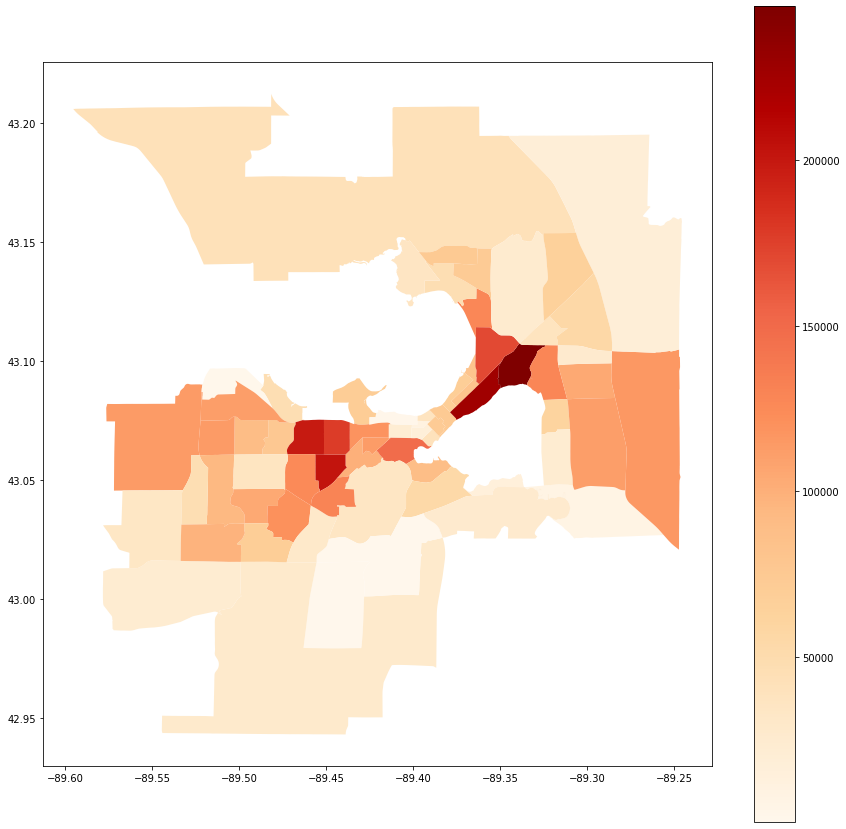

In [10]:
#df = gpd.GeoDataFrame(df,geometry = "geometry")
fig, ax = plt.subplots(1, figsize=(15,15))
ax = gdf.plot(column='sum',cmap='OrRd', legend=True, ax=ax)

In [80]:
gdf

,PSTAT,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum,NAME,geometry
0,1,2178.0,2068.0,2025.0,1840.0,2017.0,2144.0,2036.0,1698.0,1688.0,2001.0,1883.0,1882.0,23460.0,1,"POLYGON ((-89.48240 43.09452, -89.48234 43.094..."
1,10,4598.0,4124.0,4535.0,4248.0,4139.0,3836.0,4617.0,4445.0,3825.0,4078.0,3869.0,3470.0,49784.0,10,"POLYGON ((-89.42096 43.06242, -89.42073 43.062..."
2,105.01,275.0,143.0,197.0,148.0,220.0,225.0,299.0,422.0,445.0,435.0,335.0,305.0,3449.0,105.01,"POLYGON ((-89.30807 43.04794, -89.30802 43.047..."
3,107.01,2.0,1.0,0.0,23.0,16.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,107.01,"POLYGON ((-89.42802 43.00121, -89.42802 43.001..."
4,107.02,1400.0,1263.0,1294.0,1231.0,1130.0,1214.0,1246.0,1113.0,986.0,1000.0,975.0,867.0,13719.0,107.02,"POLYGON ((-89.38662 42.97124, -89.38785 42.971..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,6,1384.0,1285.0,1140.0,1206.0,1274.0,1201.0,1387.0,1555.0,1139.0,1111.0,1121.0,1108.0,14911.0,6,"POLYGON ((-89.44362 43.03477, -89.44363 43.034..."
63,7,5927.0,5680.0,6209.0,4949.0,5129.0,5447.0,5756.0,6008.0,5064.0,5067.0,5453.0,4611.0,65300.0,7,"POLYGON ((-89.44362 43.03477, -89.44456 43.034..."
64,8,7611.0,7155.0,8284.0,7681.0,7420.0,7074.0,7701.0,7520.0,7090.0,7506.0,7508.0,6550.0,89100.0,8,"POLYGON ((-89.43621 43.07417, -89.43625 43.073..."
65,9.01,4727.0,4783.0,5291.0,4848.0,4754.0,4844.0,5534.0,4836.0,4307.0,4606.0,4483.0,3555.0,56568.0,9.01,"POLYGON ((-89.41391 43.06781, -89.41394 43.067..."


In [13]:
projection = "EPSG:32616" # contains Madison
library = gdf.to_crs(projection)
bg = mdf.to_crs(projection)
# possible places where we might want the bus to stop
stations = gpd.GeoDataFrame({"geometry": bg.centroid})
stations = gpd.sjoin(stations, library)
stations

,geometry,index_right,PSTAT,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum,NAME
2,POINT (301159.600 4765937.158),18,14.03,34.0,20.0,58.0,37.0,94.0,34.0,30.0,38.0,41.0,54.0,36.0,30.0,1012.0,14.03
66,POINT (303848.228 4765498.048),18,14.03,34.0,20.0,58.0,37.0,94.0,34.0,30.0,38.0,41.0,54.0,36.0,30.0,1012.0,14.03
91,POINT (302670.996 4766097.917),18,14.03,34.0,20.0,58.0,37.0,94.0,34.0,30.0,38.0,41.0,54.0,36.0,30.0,1012.0,14.03
7,POINT (309235.887 4773647.902),34,20,10934.0,11119.0,11358.0,10586.0,10026.0,9845.0,10356.0,10710.0,9480.0,9672.0,10276.0,8927.0,246578.0,20
106,POINT (310012.754 4775030.736),34,20,10934.0,11119.0,11358.0,10586.0,10026.0,9845.0,10356.0,10710.0,9480.0,9672.0,10276.0,8927.0,246578.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,POINT (308310.301 4773857.608),29,19,10091.0,10047.0,10541.0,9995.0,10003.0,8781.0,9023.0,9191.0,8463.0,9233.0,9536.0,8557.0,226922.0,19
297,POINT (308433.719 4773412.807),29,19,10091.0,10047.0,10541.0,9995.0,10003.0,8781.0,9023.0,9191.0,8463.0,9233.0,9536.0,8557.0,226922.0,19
298,POINT (307000.408 4772408.370),29,19,10091.0,10047.0,10541.0,9995.0,10003.0,8781.0,9023.0,9191.0,8463.0,9233.0,9536.0,8557.0,226922.0,19
299,POINT (307623.990 4773067.990),29,19,10091.0,10047.0,10541.0,9995.0,10003.0,8781.0,9023.0,9191.0,8463.0,9233.0,9536.0,8557.0,226922.0,19


In [15]:
stations.groupby("NAME").count().sort_values("geometry")


,geometry,index_right,PSTAT,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum
NAME,,,,,,,,,,,,,,,,
23.02,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4.06,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
109.03,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
32,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
26.01,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
4.05,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
9.02,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [16]:
madison= gpd.read_file("zip://DataMerge/city_Limit.zip")
madison= madison.to_crs("EPSG:4326")
mdf=gpd.sjoin(blocks, madison)
mdf=mdf[["GEOID10","geometry"]]

In [20]:
mdf.to_file("block_group_2019.shp")

In [15]:
gdf.area

c:\pathon\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0     0.000228
1     0.000173
2     0.000989
3     0.001131
4     0.006720
        ...   
62    0.000361
63    0.000254
64    0.000211
65    0.000072
66    0.000149
Length: 67, dtype: float64

In [16]:
join = gpd.sjoin(mdf,gdf, how="inner", op="intersects")
join = join.sort_values("NAME")
join

,GEOID10,geometry,index_right,PSTAT,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum,NAME
277,550259917020,"POLYGON ((-89.41319 43.14705, -89.41301 43.147...",0,1,2178.0,2068.0,2025.0,1840.0,2017.0,2144.0,2036.0,1698.0,1688.0,2001.0,1883.0,1882.0,23460.0,1
277,550259917020,"POLYGON ((-89.41319 43.14705, -89.41301 43.147...",0,1,2178.0,2068.0,2025.0,1840.0,2017.0,2144.0,2036.0,1698.0,1688.0,2001.0,1883.0,1882.0,23460.0,1
76,550250101002,"POLYGON ((-89.44379 43.07602, -89.44381 43.075...",0,1,2178.0,2068.0,2025.0,1840.0,2017.0,2144.0,2036.0,1698.0,1688.0,2001.0,1883.0,1882.0,23460.0,1
109,550250001001,"POLYGON ((-89.48556 43.09155, -89.48554 43.091...",0,1,2178.0,2068.0,2025.0,1840.0,2017.0,2144.0,2036.0,1698.0,1688.0,2001.0,1883.0,1882.0,23460.0,1
110,550250001002,"POLYGON ((-89.47366 43.07492, -89.47367 43.074...",0,1,2178.0,2068.0,2025.0,1840.0,2017.0,2144.0,2036.0,1698.0,1688.0,2001.0,1883.0,1882.0,23460.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,550250009023,"POLYGON ((-89.42863 43.06794, -89.42899 43.067...",66,9.02,5485.0,5006.0,5172.0,4943.0,5187.0,5171.0,5485.0,5339.0,4684.0,4696.0,4482.0,3969.0,59619.0,9.02
162,550250009024,"POLYGON ((-89.43024 43.06703, -89.43213 43.065...",66,9.02,5485.0,5006.0,5172.0,4943.0,5187.0,5171.0,5485.0,5339.0,4684.0,4696.0,4482.0,3969.0,59619.0,9.02
163,550250009021,"POLYGON ((-89.41959 43.07302, -89.41972 43.073...",66,9.02,5485.0,5006.0,5172.0,4943.0,5187.0,5171.0,5485.0,5339.0,4684.0,4696.0,4482.0,3969.0,59619.0,9.02
164,550250009022,"POLYGON ((-89.41742 43.07166, -89.41739 43.071...",66,9.02,5485.0,5006.0,5172.0,4943.0,5187.0,5171.0,5485.0,5339.0,4684.0,4696.0,4482.0,3969.0,59619.0,9.02


In [23]:
gpd.overlay(mdf, gdf, how='intersection').groupby("NAME").get_group("1").area

#test/div
#test1.index = test1.index.astype(int)
#test1

,GEOID10,PSTAT,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum,NAME,geometry
0,550250014031,107.01,2.0,1.0,0.0,23.0,16.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,107.01,"POLYGON ((-89.42714 43.01577, -89.42714 43.015..."
1,550250006003,107.01,2.0,1.0,0.0,23.0,16.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,107.01,"POLYGON ((-89.45535 43.01541, -89.45535 43.015..."
2,550250014032,107.01,2.0,1.0,0.0,23.0,16.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,107.01,"POLYGON ((-89.42479 43.01536, -89.42492 43.015..."
3,550250014031,14.03,34.0,20.0,58.0,37.0,94.0,34.0,30.0,38.0,41.0,54.0,36.0,30.0,506.0,14.03,"POLYGON ((-89.44960 43.02226, -89.44958 43.022..."
4,550250014033,14.03,34.0,20.0,58.0,37.0,94.0,34.0,30.0,38.0,41.0,54.0,36.0,30.0,506.0,14.03,"POLYGON ((-89.42801 43.00121, -89.42796 43.001..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,550250014013,14.01,2371.0,2345.0,2445.0,2245.0,2566.0,1932.0,2210.0,2227.0,2023.0,2578.0,2196.0,2011.0,27149.0,14.01,"POLYGON ((-89.39401 43.04002, -89.39401 43.039..."
547,550250014011,14.01,2371.0,2345.0,2445.0,2245.0,2566.0,1932.0,2210.0,2227.0,2023.0,2578.0,2196.0,2011.0,27149.0,14.01,"POLYGON ((-89.39391 43.03607, -89.39395 43.036..."
548,550250014014,14.01,2371.0,2345.0,2445.0,2245.0,2566.0,1932.0,2210.0,2227.0,2023.0,2578.0,2196.0,2011.0,27149.0,14.01,"POLYGON ((-89.39406 43.04599, -89.39406 43.046..."
549,550250014012,14.01,2371.0,2345.0,2445.0,2245.0,2566.0,1932.0,2210.0,2227.0,2023.0,2578.0,2196.0,2011.0,27149.0,14.01,"POLYGON ((-89.40398 43.03862, -89.40337 43.038..."


<AxesSubplot:>

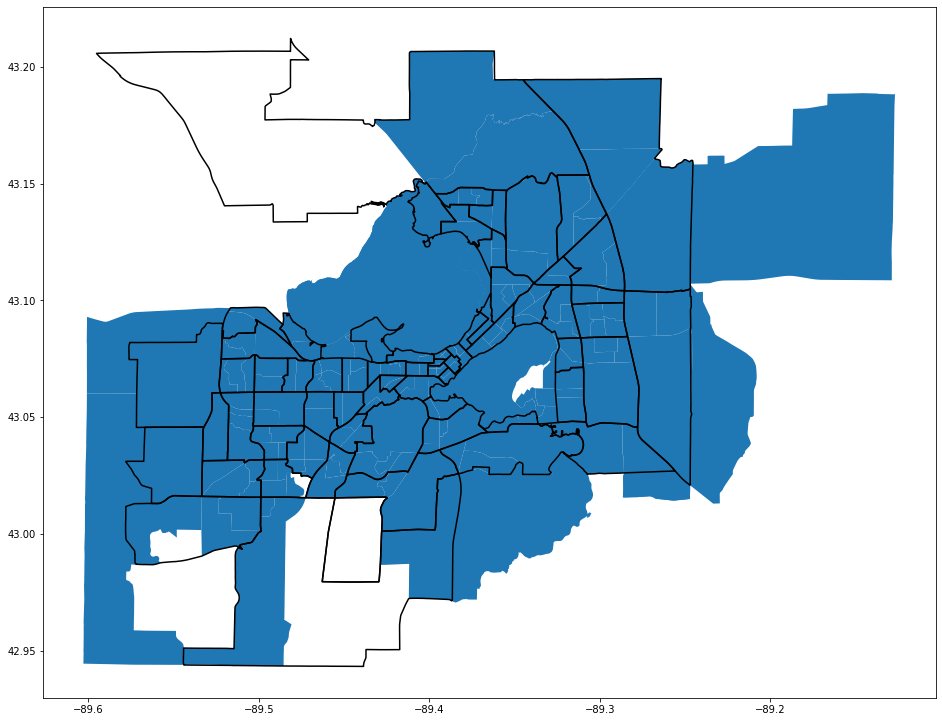

In [14]:
# mdf -- blcok group

ax = mdf.plot(figsize = (16,16))
gdf.boundary.plot(ax = ax, color = 'black')

In [19]:
x = gdf[["NAME","sum","geometry"]]
x.to_file("library_census_tract_2010.shp")

In [21]:
gdf[gdf["NAME"]=="1"].area
#test2.index = test2.index.astype(int)

c:\pathon\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0    0.000228
dtype: float64

In [ ]:
eachArea = gpd.overlay(mdf, gdf, how='intersection').groupby("NAME").get_group("1").area
tract = gdf[gdf["NAME"]=="1"].area


In [18]:
eachArea = gpd.overlay(mdf, gdf, how='intersection').groupby("NAME").get_group("1").area
tract = gdf[gdf["NAME"]=="1"].area

c:\pathon\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
c:\pathon\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [19]:
areadf = pd.DataFrame(eachArea)

In [21]:
areadf/tract

,0
419,0.000507
420,0.499133
421,0.499612
422,0.000012
423,0.000186
424,0.000391
425,0.000391


In [35]:
projection = "EPSG:32616" # contains Madison
gdf = gdf.to_crs(projection)
mdf = mdf.to_crs(projection)

In [36]:
for name in gdf.NAME:

    eachblock = gpd.overlay(mdf, gdf, how='intersection').groupby("NAME").get_group(name)
    eachblock["area"] = eachblock.area

    tract = float(gdf[gdf["NAME"]==name].area)
    eachblock["percentage"] = eachblock["area"]/tract

    eachblock["allowcation"] = eachblock["percentage"]*eachblock["sum"]


    df = df.append(eachblock)


In [44]:
newdf = df.groupby("GEOID10").sum().reset_index()
newdf = newdf[["GEOID10","allowcation"]]
newgdf = pd.merge(newdf,mdf,on="GEOID10")
newgdf

,GEOID10,allowcation,geometry
0,550250001001,23417.815981,"POLYGON ((297702.974 4773980.159, 297704.443 4..."
1,550250001002,23477.827790,"POLYGON ((298616.562 4772104.976, 298615.843 4..."
2,550250002011,44012.624158,"POLYGON ((298417.493 4772041.492, 298421.964 4..."
3,550250002012,32975.576085,"POLYGON ((298075.385 4770555.471, 298064.388 4..."
4,550250002021,50244.820095,"POLYGON ((297585.776 4771258.900, 297579.254 4..."
...,...,...,...
194,550250114023,7287.501060,"POLYGON ((315864.764 4781826.033, 315863.784 4..."
195,550250117002,3.293381,"POLYGON ((322275.459 4783198.093, 322276.928 4..."
196,550259917020,892.204650,"POLYGON ((303770.316 4779971.396, 303784.890 4..."
197,550259917020,892.204650,"POLYGON ((303770.316 4779971.396, 303784.890 4..."


In [47]:
gdf = gpd.GeoDataFrame(newgdf, geometry='geometry')
gdf

,GEOID10,allowcation,geometry
0,550250001001,23417.815981,"POLYGON ((297702.974 4773980.159, 297704.443 4..."
1,550250001002,23477.827790,"POLYGON ((298616.562 4772104.976, 298615.843 4..."
2,550250002011,44012.624158,"POLYGON ((298417.493 4772041.492, 298421.964 4..."
3,550250002012,32975.576085,"POLYGON ((298075.385 4770555.471, 298064.388 4..."
4,550250002021,50244.820095,"POLYGON ((297585.776 4771258.900, 297579.254 4..."
...,...,...,...
194,550250114023,7287.501060,"POLYGON ((315864.764 4781826.033, 315863.784 4..."
195,550250117002,3.293381,"POLYGON ((322275.459 4783198.093, 322276.928 4..."
196,550259917020,892.204650,"POLYGON ((303770.316 4779971.396, 303784.890 4..."
197,550259917020,892.204650,"POLYGON ((303770.316 4779971.396, 303784.890 4..."


<AxesSubplot:>

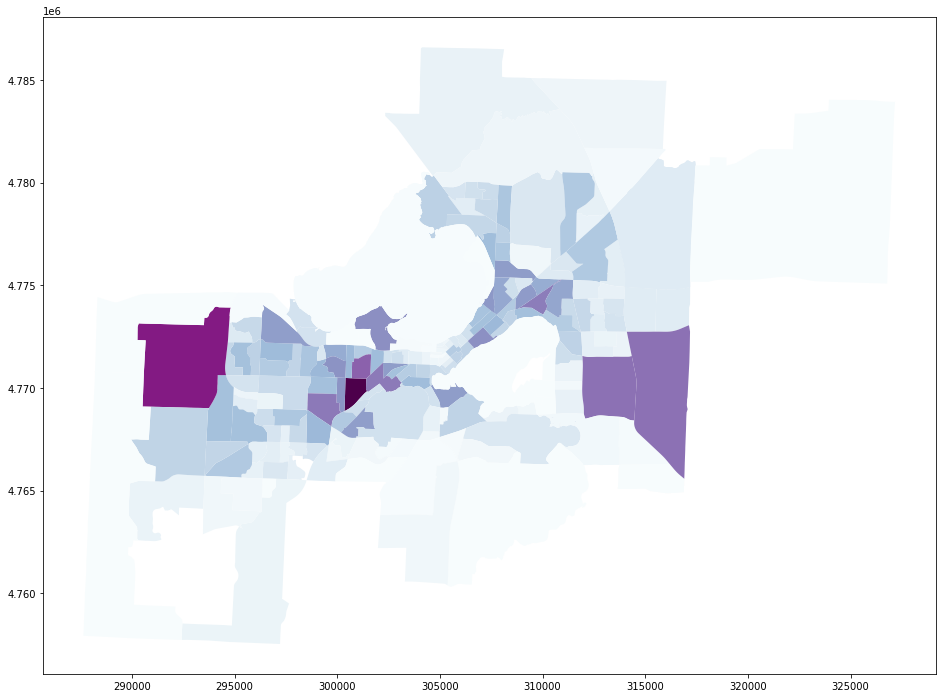

In [51]:
gdf.plot(column="allowcation",figsize = (16,16),cmap="BuPu")

In [52]:
gdf.to_file("circulation.shp")

In [86]:
join.sort_values("index_left")

,index_left,GEOID10,PSTAT,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum_x,sum_y,sum,NAME,geometry
18,2,550250014031,14.03,34.0,20.0,58.0,37.0,94.0,34.0,30.0,38.0,41.0,54.0,36.0,30.0,506.0,14.03,"POLYGON ((-89.38301 43.02580, -89.38313 43.025..."
62,2,550250014031,6,1384.0,1285.0,1140.0,1206.0,1274.0,1201.0,1387.0,1555.0,1139.0,1111.0,1121.0,1108.0,14911.0,6,"POLYGON ((-89.44362 43.03477, -89.44363 43.034..."
3,2,550250014031,107.01,2.0,1.0,0.0,23.0,16.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,107.01,"POLYGON ((-89.42802 43.00121, -89.42802 43.001..."
29,7,550250020003,19,10091.0,10047.0,10541.0,9995.0,10003.0,8781.0,9023.0,9191.0,8463.0,9233.0,9536.0,8557.0,113461.0,19,"POLYGON ((-89.34976 43.08855, -89.34993 43.088..."
34,7,550250020003,20,10934.0,11119.0,11358.0,10586.0,10026.0,9845.0,10356.0,10710.0,9480.0,9672.0,10276.0,8927.0,123289.0,20,"POLYGON ((-89.32368 43.10666, -89.32399 43.106..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,299,550250019004,19,10091.0,10047.0,10541.0,9995.0,10003.0,8781.0,9023.0,9191.0,8463.0,9233.0,9536.0,8557.0,113461.0,19,"POLYGON ((-89.34976 43.08855, -89.34993 43.088..."
29,300,550250019002,19,10091.0,10047.0,10541.0,9995.0,10003.0,8781.0,9023.0,9191.0,8463.0,9233.0,9536.0,8557.0,113461.0,19,"POLYGON ((-89.34976 43.08855, -89.34993 43.088..."
29,301,550250020004,19,10091.0,10047.0,10541.0,9995.0,10003.0,8781.0,9023.0,9191.0,8463.0,9233.0,9536.0,8557.0,113461.0,19,"POLYGON ((-89.34976 43.08855, -89.34993 43.088..."
34,301,550250020004,20,10934.0,11119.0,11358.0,10586.0,10026.0,9845.0,10356.0,10710.0,9480.0,9672.0,10276.0,8927.0,123289.0,20,"POLYGON ((-89.32368 43.10666, -89.32399 43.106..."


In [27]:
#g = gpd.read_file(f'zip+s3://plot/background/tract_plot.zip')
listlib = ["PSTAT","HPB","HAW","LAK","MAD","MEA","MSB","PIN","SEQ","SMB","geometry","Municipality"]

dfdict[2]["sum"] = dfdict[2][madLib].sum(axis=1)
dfdict[2]["sum"]

#g = gpd.read_file("zip://plot/background/tract_plot.zip")
#g


0     2068.0
1     4124.0
2      143.0
3        1.0
4     1263.0
       ...  
62    1285.0
63    5680.0
64    7155.0
65    4783.0
66    5006.0
Name: sum, Length: 67, dtype: float64

In [ ]:
df = pd.merge(filter_data,g,left_on="PSTAT",right_on="NAME",how="left")
df = gpd.GeoDataFrame(df,geometry = "geometry")

In [13]:
dfdict[1][madLib]

,HPB,HAW,LAK,MAD,MEA,MSB,PIN,SEQ,SMB
130,264.0,7.0,70.0,226.0,49.0,108.0,NaN,1330.0,124.0
131,41.0,16.0,12.0,475.0,3.0,1043.0,21.0,2972.0,15.0
132,13.0,2.0,2.0,130.0,NaN,4.0,44.0,64.0,16.0
133,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
134,107.0,NaN,63.0,167.0,412.0,21.0,2.0,591.0,37.0
...,...,...,...,...,...,...,...,...,...
192,58.0,4.0,16.0,154.0,134.0,7.0,25.0,809.0,177.0
193,66.0,18.0,6.0,373.0,114.0,178.0,10.0,5102.0,60.0
194,156.0,40.0,53.0,669.0,15.0,172.0,9.0,6489.0,8.0
195,95.0,4.0,21.0,229.0,13.0,3039.0,56.0,1266.0,4.0


In [9]:
df = pd.DataFrame.from_dict(dfdict)
df

ValueError: If using all scalar values, you must pass an index

In [9]:
#browse the data from the orgin file

def dataBrowse(year,name,category = None):
    df = pd.read_excel('./time_slot/'+name+'-circ-by-time-wkday'+str(year)+'-01.xlsx')
    if category != None:
        df = df[["Timeslot",category]]
        df = df.drop(columns=name+' Total Circ')
    else:
        pass
    for i in range(2,13):
        month = "0"+str(i) if i < 10 else str(i)
        fileLink = './time_slot/'+name+'-circ-by-time-wkday'+str(year)+'-'+ month +".xlsx"
        if category != None:
            df1 = pd.read_excel(fileLink)[["Timeslot",category]]
            df1 =df1.drop(columns=name+' Total Circ')
        else:
            df1 = pd.read_excel(fileLink)
            df1 =df1.drop(columns=name+' Total Circ')
        df = pd.merge(df,df1,on="Timeslot",how="right",suffixes=(i-1,i))
    df = df.drop(columns=name+' Total Circ')
    df["Avg(thousand)"] = df.sum(axis= 1)/12000
    return df

In [10]:
datadict = {}
for lib in madLib:
    datadict[lib] = dataBrowse(2019, lib,category = None)

In [13]:
for key,value in datadict.items():
    value.to_csv(key+"wkday.csv")
